<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Векторизация" data-toc-modified-id="Векторизация-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Векторизация</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#LinearSVC" data-toc-modified-id="LinearSVC-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LinearSVC</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

from lightgbm import LGBMClassifier

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')

/tmp/ipykernel_350/3475678917.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Загрузка данных

In [2]:
comments = pd.read_csv('/datasets/toxic_comments.csv')


### Анализ

In [3]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [4]:
comments['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

In [5]:
comments

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
159287,159446,""":::::And for the second time of asking, when ...",0
159288,159447,You should be ashamed of yourself \n\nThat is ...,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,159449,And it looks like it was actually you who put ...,0


Пропусков нет

Построим распределение целевого признака

Text(0.5, 1.0, 'Распределение целевого признака')

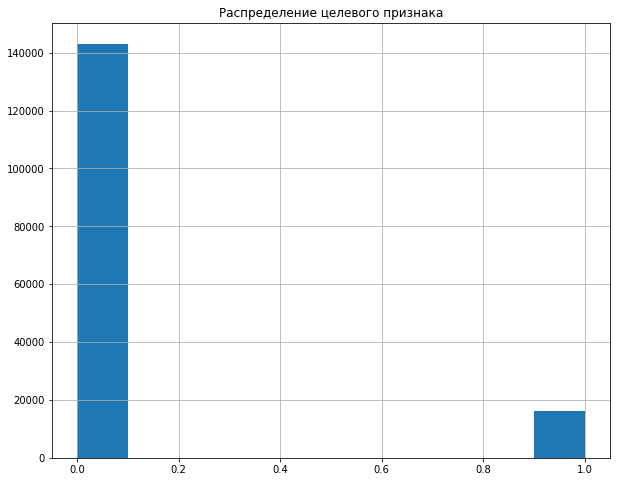

In [6]:
plt.figure(figsize=(10, 8))
comments['toxic'].hist()
plt.title('Распределение целевого признака')

In [7]:
comments.shape

(159292, 3)

In [8]:
comments['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

In [9]:
print(f"Процент объектов класса 1 к общему объёму датасета: {(sum(comments['toxic']) / len(comments) * 100):.2f}%")

Процент объектов класса 1 к общему объёму датасета: 10.16%


В наличии сильный дисбаланс классов

### Предобработка

#### Лемматизация

In [10]:
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

In [11]:
def clear_text(text):
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    return " ".join(text.split())

In [12]:
corpus = comments['text'].values

In [13]:
corpus_lemm = [lemmatize(clear_text(corpus[i])) for i in range(len(corpus))]

In [14]:
stopwords = set(nltk_stopwords.words('english'))

Разделим данные на тренировочную и тестовую выборки

In [15]:
X_train, X_test, y_train, y_test = train_test_split(corpus_lemm, comments['toxic'], 
                                                    test_size=0.2,
                                                    random_state=42)

In [16]:
print(f"Размер тренировочного корпуса: {len(X_train)}")
print(f"Размер тестового корпуса: {len(X_test)}")

Размер тренировочного корпуса: 127433
Размер тестового корпуса: 31859


#### Векторизация

In [17]:
tf_idf_vec = TfidfVectorizer(ngram_range=(1,1), stop_words=stopwords,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )

In [18]:
X_train_vec = tf_idf_vec.fit_transform(X_train)

In [19]:
X_test_vec = tf_idf_vec.transform(X_test)

In [20]:
print(f"Размер тренировочного датасета: {X_train_vec.shape}")
print(f"Размер тестового датасета: {X_test_vec.shape}")

Размер тренировочного датасета: (127433, 41662)
Размер тестового датасета: (31859, 41662)


## Обучение

Найдём метрику accuracy для константной модели. Будем предсказывать все твиты нетоксичными ('toxic'=0)

In [21]:
base_predicts = pd.Series(data=np.zeros((len(y_test))), index=y_test.index, dtype='int16')
base_accuacy = accuracy_score(y_test, base_predicts)
print(f"Accuracy константной модели {base_accuacy:.3f}")

Accuracy константной модели 0.900


### Logistic Regression

Обучение, подбор гиперпараметров, кросс-валидацию проведём с помощью GridSearchCV библиотеки sklearn
Подбирать будем гиперпараметр регуляризации С

In [22]:
parameters = {'C': np.linspace(10, 20, num = 11, endpoint = True),
             'max_iter': [100]}
lrm = LogisticRegression()
clf = GridSearchCV(lrm, parameters,
                  cv=5,
                  scoring='f1',
                  n_jobs=-1,
                  verbose=2)
clf.fit(X_train_vec, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ...............................C=10.0, max_iter=100; total time=  29.2s
[CV] END ...............................C=10.0, max_iter=100; total time=  28.6s
[CV] END ...............................C=10.0, max_iter=100; total time=  28.5s
[CV] END ...............................C=10.0, max_iter=100; total time=  31.4s
[CV] END ...............................C=10.0, max_iter=100; total time=  31.6s
[CV] END ...............................C=11.0, max_iter=100; total time=  36.8s
[CV] END ...............................C=11.0, max_iter=100; total time=  30.8s
[CV] END ...............................C=11.0, max_iter=100; total time=  30.2s
[CV] END ...............................C=11.0, max_iter=100; total time=  32.7s
[CV] END ...............................C=11.0, max_iter=100; total time=  32.2s
[CV] END ...............................C=12.0, max_iter=100; total time=  35.6s
[CV] END ...............................C=12.0, 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.]),
                         'max_iter': [100]},
             scoring='f1', verbose=2)

<div class="alert alert-warning">
<b>1 Комментарий ревьюера ⚠️:</b> 
    
Немного про утечку тестовых данных (совет): если делать кросс-валидацию на признаках TF-IDF - произойдет утечка тестовых данных. Чтобы не попадала информация о словах из тест. выборки в тренировочную, мы обучаем `TfidfVectorizer` на тренировочной выборке, после чего трансформируем тест. выборку. <br>**Но наша ситуация при кросс-валидации**: тренировочная выборка делится на тренировочные фолды и тестовый фолд, при этом `TfidfVectorizer` обучался на всех фолдах в сумме. Решение проблемы: [Pipelines](https://stackoverflow.com/questions/46010617/do-i-use-the-same-tfidf-vocabulary-in-k-fold-cross-validation), где получение признаков `TF-IDF` происходит каждый раз, когда выборка делится на тренировочные и тестовые фолды </div>

In [23]:
print(f"Наилучший показатель f1 на кросс-валидации : {clf.best_score_:.3f}")
print(f"Параметр регуляризации для лучшей модели: {clf.best_params_}")

Наилучший показатель f1 на кросс-валидации : 0.773
Параметр регуляризации для лучшей модели: {'C': 12.0, 'max_iter': 100}


In [29]:
#lrm = LogisticRegression(C=13, max_iter=100)
#lrm.fit(X_train_vec, y_train)
#predict = lrm.predict(X_test_vec)
#f1_lr = f1_score(y_test, predict)

In [25]:
#print(f"Показатель f1 на тестовой выборке: {f1_lr:.3f}")

Проверим модель на адекватность. Рассчитаем метрику accuracy и сравним её с константной моделью

In [30]:
#accuracy_lr = accuracy_score(y_test, predict)
#print(f"Accuracy на логистической регрессии {accuracy_lr:.3f}, больше, чем на константной модели")

### LinearSVC

In [31]:
parameters = {'C': np.linspace(1, 31, num = 7, endpoint = True)}
lsvcm = LinearSVC(max_iter = 1000)

In [32]:
clf_lsvc = GridSearchCV(lsvcm, parameters,
                  cv=5,
                  scoring='f1',
                  n_jobs=-1,
                  verbose=2)

In [33]:
clf_lsvc.fit(X_train_vec, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..............................................C=1.0; total time=   0.6s
[CV] END ..............................................C=1.0; total time=   0.7s
[CV] END ..............................................C=1.0; total time=   0.7s
[CV] END ..............................................C=1.0; total time=   0.7s
[CV] END ..............................................C=1.0; total time=   0.6s
[CV] END ..............................................C=6.0; total time=   1.7s
[CV] END ..............................................C=6.0; total time=   1.6s
[CV] END ..............................................C=6.0; total time=   2.3s
[CV] END ..............................................C=6.0; total time=   2.1s
[CV] END ..............................................C=6.0; total time=   1.7s
[CV] END .............................................C=11.0; total time=   2.4s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([ 1.,  6., 11., 16., 21., 26., 31.])},
             scoring='f1', verbose=2)

In [34]:
print(f"Наилучший показатель f1 на кросс-валидации : {clf_lsvc.best_score_:.3f}")
print(f"Параметр регуляризации для лучшей модели: {clf_lsvc.best_params_}")

Наилучший показатель f1 на кросс-валидации : 0.776
Параметр регуляризации для лучшей модели: {'C': 1.0}


Лучший резултат на валидационной выборке показала модель LinearSVC. Протестируем её на тестовой выборке.

In [36]:
lsvcm = LogisticRegression(C=11,
                           max_iter=1000)
lsvcm.fit(X_train_vec, y_train)
predict = lsvcm.predict(X_test_vec)
f1_lsvc = f1_score(y_test, predict)

In [37]:
print(f"Показатель f1 на тестовой выборке: {f1_lsvc:.3f}")

Показатель f1 на тестовой выборке: 0.776


## Выводы

Данные о токсичности твитов успешно загружены и обработаны:
Лемматизация проведена с помощью WordNetLemmatizer библиотеки nltk
Знаки пунктуации, а также лишние пробелы удалены
Стоп слова удалены (список взят из библиотеки nltk)
Корпус векторизован с помощью TfidfVectorizer
На получившихся данных обучены модели: LogisticRegression, LinearSVC.

Кросс-валидация моделей и подбор гиперпараметров проводились с помощью GridSearchCV.

Качество моделей практически одинаково. Разница не более 1%. 
Максимальный показатель f1 получен для LinearSVC: 0,776

Модель:

LogisticRegression	Наилучший показатель f1 на кросс-валидации : 0.773

LinearSVC	Показатель f1 на тестовой выборке f1 на  : 0.776

Выбрана модель LinearSVC, показавшая лучший результат на валидационной выборке 0,776.

Модель LinearSVC на тестовой выборке показала результат 0,776.



## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны